In [409]:
#Import Library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
import seaborn as sns
pd.set_option('display.max_columns',None)


In [410]:
#Load the dataset
ratings = pd.read_csv( 'C:/Users/shahb/Desktop/Data Science/Practice_Python/IGNOSIS_assi/1938_3914_bundle_archive/ratings.csv' )
t_read = pd.read_csv( 'C:/Users/shahb/Desktop/Data Science/Practice_Python/IGNOSIS_assi/1938_3914_bundle_archive/to_read.csv' )
book = pd.read_csv( 'C:/Users/shahb/Desktop/Data Science/Practice_Python/IGNOSIS_assi/1938_3914_bundle_archive/books.csv' )
tags = pd.read_csv( 'C:/Users/shahb/Desktop/Data Science/Practice_Python/IGNOSIS_assi/1938_3914_bundle_archive/tags.csv' )
b_tags = pd.read_csv( 'C:/Users/shahb/Desktop/Data Science/Practice_Python/IGNOSIS_assi/1938_3914_bundle_archive/book_tags.csv')

In [411]:
#Length of Rating dataset
len(ratings)



981756

In [412]:
#Length of to_read dataset
len(t_read)

912705

In [413]:
#Length of Book dataset
len(book)

10000

In [414]:
#Length of tags dataset
len(tags)


34252

In [415]:
#Length of Book_tags dataset
len(b_tags)

999912

In [416]:
#Checking null value on books data
book.isna().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [417]:
#Checking Book dataset shape
book.shape

(10000, 23)

In [418]:
#Getting the Book columns
book.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [420]:
# Deleting the unnecessary columns from Books data
book.drop(columns=["image_url", "small_image_url", 'isbn','isbn13','language_code'], inplace=True)


In [421]:
# Remove rows with non-ASCII characters in reviewerName and title column
book = book[~book.title.str.contains(r'[^\x00-\x7F]')]


In [422]:
# Resets the index
book = book.reset_index(drop=True)

# Check and see the cleaned data
book.head(5)

,id,book_id,best_book_id,work_id,books_count,authors,original_publication_year,original_title,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [423]:
#Again check the shape of book data
book.shape

(9850, 18)

In [424]:
#Replace the value
book.columns = book.columns.str.strip().str.lower().str.replace('-', '_')

In [425]:
#Getting the 5 rows of data
book.head(5)

,id,book_id,best_book_id,work_id,books_count,authors,original_publication_year,original_title,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [426]:
book.describe()

,id,book_id,best_book_id,work_id,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,9850.000000,9.850000e+03,9.850000e+03,9.850000e+03,9850.000000,9830.000000,9850.000000,9.850000e+03,9.850000e+03,9850.000000,9850.000000,9850.000000,9850.000000,9.850000e+03,9.850000e+03
mean,4988.581117,5.248012e+06,5.456000e+06,8.638638e+06,75.689340,1982.585351,4.002908,5.441782e+04,6.011529e+04,2930.378376,1352.208832,3130.010660,11556.732183,2.011218e+04,2.396416e+04
std,2887.842458,7.581463e+06,7.837138e+06,1.176778e+07,170.596989,148.860956,0.253391,1.583247e+05,1.688121e+05,6143.701624,6682.010120,9775.402912,28697.088330,5.174130e+04,8.028670e+04
min,1.000000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,-1750.000000,2.470000,2.773000e+03,6.323000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2484.250000,4.528725e+04,4.722925e+04,1.008185e+06,23.000000,1990.000000,3.850000,1.363000e+04,1.549125e+04,691.000000,196.000000,657.250000,3128.000000,5.439500e+03,5.348250e+03
50%,4990.500000,3.859420e+05,4.076210e+05,2.707919e+06,40.000000,2004.000000,4.020000,2.130600e+04,2.395650e+04,1403.000000,391.000000,1166.000000,4914.500000,8.332500e+03,8.870000e+03
75%,7488.750000,9.304214e+06,9.595193e+06,1.448049e+07,67.000000,2011.000000,4.180000,4.138600e+04,4.629325e+04,2752.500000,885.750000,2363.750000,9353.250000,1.623775e+04,1.740900e+04
max,10000.000000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C40BF06808>,
      dtype=object)

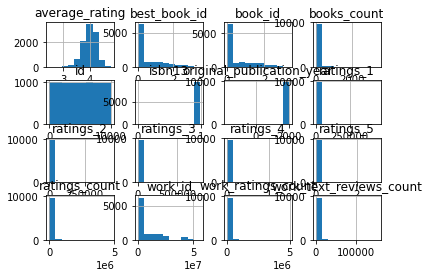

In [330]:
#Visualization on Books data
book.hist()

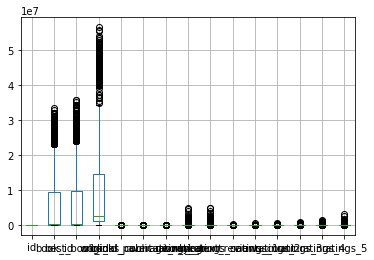

In [383]:
#Visualize the Boxplot on Book data
book.boxplot()

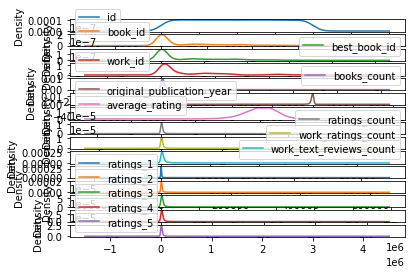

In [384]:
#Density plot
book.plot(kind='density',subplots=True,sharex=False)
plt.show()

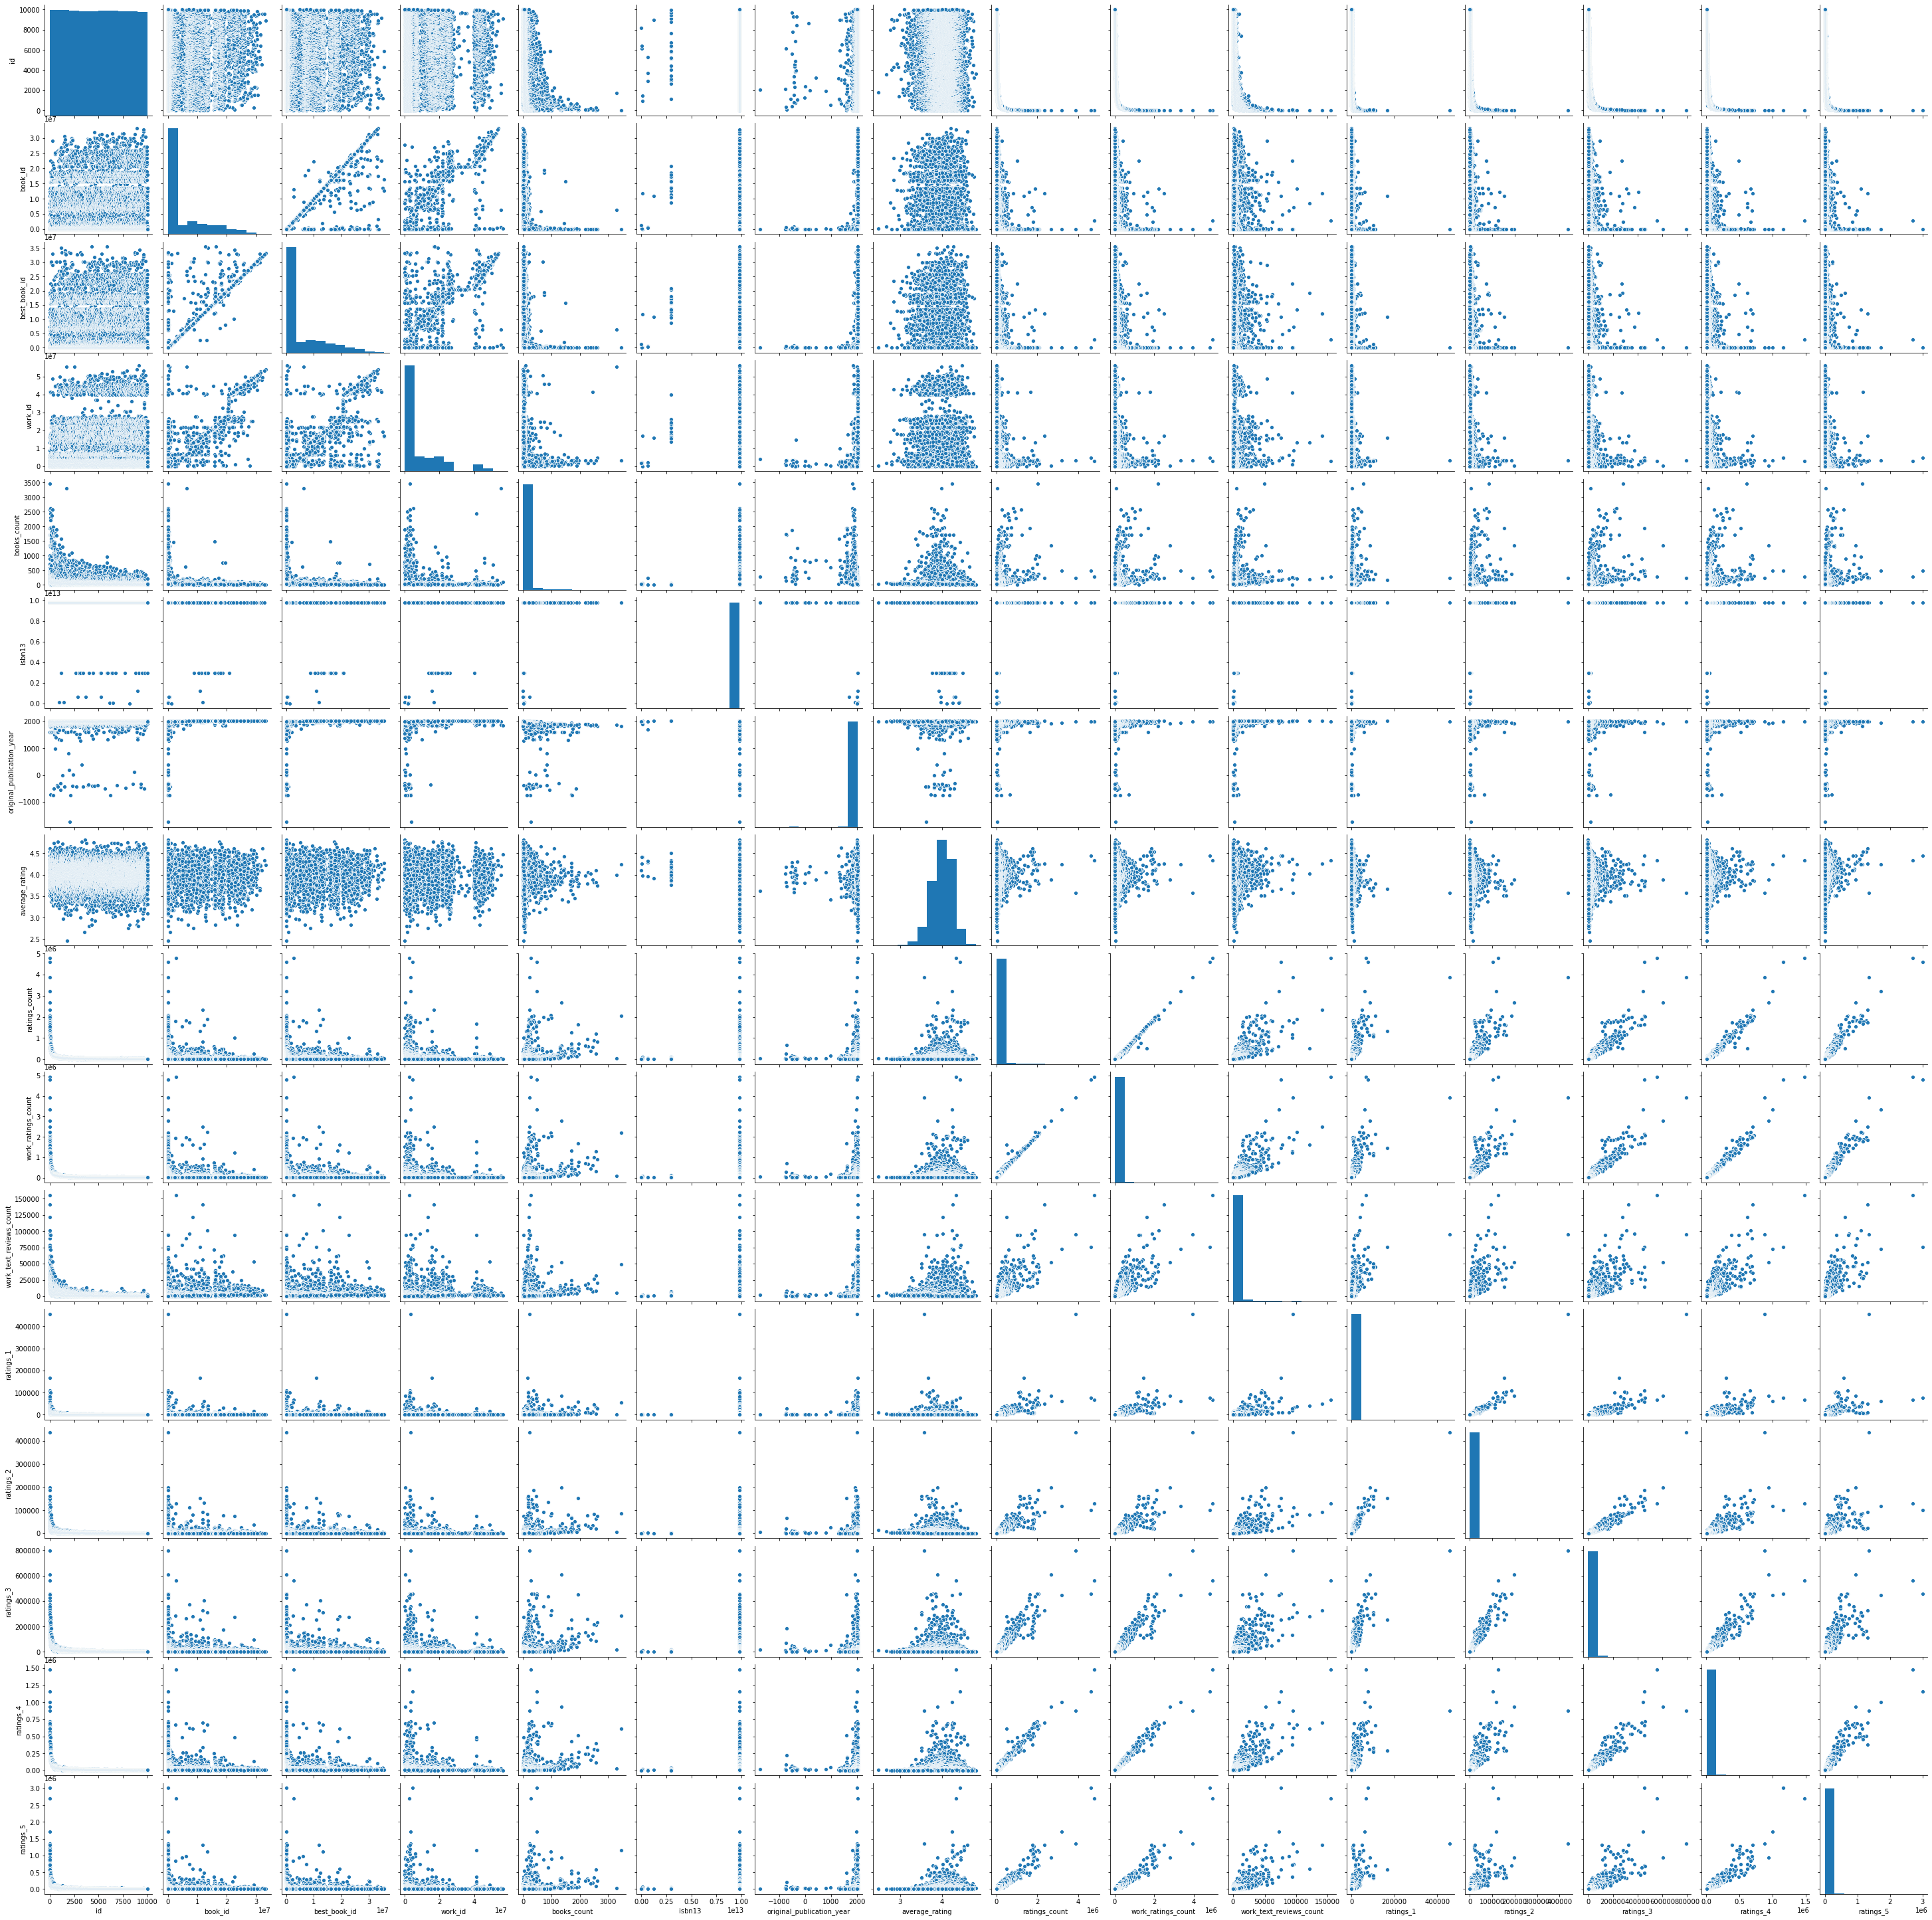

In [333]:
#Visualize the pairplot to check the corelation on Book data
sns.pairplot(book.iloc[:,:])

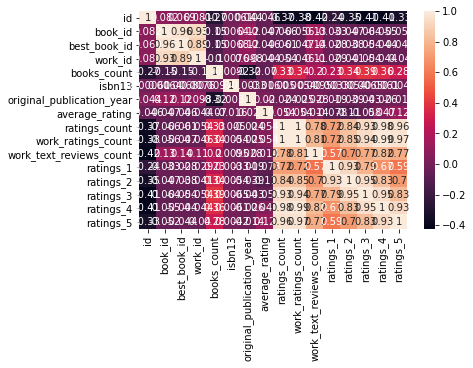

In [179]:
sns.heatmap(book.corr(),annot = True)

In [427]:
#Checking null values on Ratings data : as no null values
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [428]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [429]:
#Getting unique values of rating
ratings['rating'].value_counts()

4    357366
5    292961
3    248623
2     63231
1     19575
Name: rating, dtype: int64

In [430]:
#Getting maximum value of book_id column
ratings.book_id.max()

10000

In [431]:
#Reviews as per book_id
reviews_book = ratings.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))

In [432]:
reviews_book.describe()

count    10000.000000
mean        98.175600
std          5.690167
min          8.000000
25%         99.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: book_id, dtype: float64

In [433]:
#The IDs are contiguous.
assert( len( ratings.user_id.unique()) == ratings.user_id.max())
assert( len( ratings.book_id.unique()) == ratings.book_id.max())

In [434]:
#Sorting the review per book
reviews_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    34
9315    36
9553    41
8181    44
9260    46
9479    47
9705    48
Name: book_id, dtype: int64

In [435]:
#Reviews as per User_id
reviews_user = ratings.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_user.describe()

count    53424.000000
mean        18.376685
std         26.268690
min          2.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        200.000000
Name: user_id, dtype: float64

In [436]:
reviews_user.sort_values().head( 10 )

user_id
9253     2
28673    2
42222    2
21323    2
42219    2
42214    2
42209    2
21321    2
9964     2
9944     2
Name: user_id, dtype: int64

In [437]:
# book info
rating_count = ratings.shape[0]
#percent_of_total = (rating_count / ratings_on_books) * 100

mean_rating = ratings['rating'].mean()
print('Mean rating: %s' % round(mean_rating, 2))
median_rating = ratings['rating'].median()
print('Median rating: %s' % median_rating)

user_count = ratings['user_id'].nunique()
print('Total number of users in dataset: %s' % "{:,}".format(user_count))
ratings_per_user = rating_count / user_count
print('Ratings per user: %s' % round(ratings_per_user, 2))

Mean rating: 3.86
Median rating: 4.0
Total number of users in dataset: 53,424
Ratings per user: 18.38


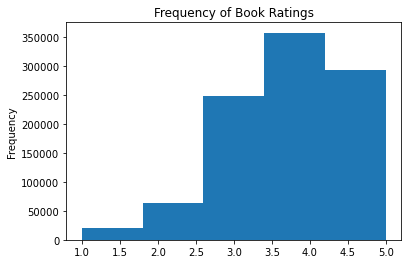

In [396]:
# Create a histogram of the ratings
ratings['rating'].plot(kind='hist',bins = 5, title='Frequency of Book Ratings')

In [400]:
#Getting rows of rating data
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [443]:
# Merge the two tables then pivot so we have Users X Books dataframe. 
ratings_title = pd.merge(ratings, book[['book_id', 'title']], on='book_id' )
user_book_ratings = pd.pivot_table(ratings_title, index='user_id', columns= 'title', values='rating')


In [444]:
ratings_title.head()

,book_id,user_id,rating,title
0,1,314,5,Harry Potter and the Half-Blood Prince (Harry ...
1,1,439,3,Harry Potter and the Half-Blood Prince (Harry ...
2,1,588,5,Harry Potter and the Half-Blood Prince (Harry ...
3,1,1169,4,Harry Potter and the Half-Blood Prince (Harry ...
4,1,1185,4,Harry Potter and the Half-Blood Prince (Harry ...


In [445]:
user_book_ratings.head()

title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,"A Great and Terrible Beauty (Gemma Doyle, #1)",A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr Biswas,A Lesson Before Dying,A Little Princess,"A Living Nightmare (Cirque Du Freak, #1)",A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,A Son of the Circus,A Spot of Bother,A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments,A Tale of Two Cities,A Virtuous Woman,A Walk in the Woods,A Walk to Remember,A Widow for One Year,A Woman of Substance (Emma Harte Saga #1),About a Boy,"Agamemnon (Oresteia, #1)","Ahab's Wife, or The Star-Gazer",Airframe,All Families are Psychotic,All the King's Men,All the Names,"All-of-a-Kind Family (All-of-a-Kind Family, #1)","Allies of the Night (Cirque du Freak, #8)",America (The Book): A Citizen's Guide to Democracy Inaction,"American Gods (American Gods, #1)",Amsterdam,An Ideal Husband,Anansi Boys,"Angels & Demons (Robert Langdon, #1)",Anil's Ghost,Animal Farm,Animal Farm / 1984,Anne Frank Remembered: The Story of the Woman Who Helped to Hide the Frank Family,Anne Frank: Beyond the Diary - A Photographic Remembrance,"Anne of Green Gables (Anne of Green Gables, #1)",Another Bullshit Night in Suck City,Another Roadside Attraction,Anthem,"Antigone (The Theban Plays, #3)",As the Crow Flies,Assassination Vacation,Atlas Shrugged,Atonement,Awakening the Buddha Within: Tibetan Wisdom for the Western World,Bagombo Snuff Box,Baltasar and Blimunda,Barrel Fever: Stories and Essays,Bel Canto,Beloved,"Betsy-Tacy (Betsy-Tacy, #1)",Birdsong,Black Beauty,Black and Blue,"Bleach, Volume 01","Bleach, Volume 15",Bleachers,"Blind Willow, Sleeping Woman",Blindness,Blink,Blue Like Jazz: Nonreligious Thoughts on Christian Spirituality,Blue Ocean Strategy: How To Create Uncontested Market Space And Make The Competition Irrelevant,Bluebeard,"Book of the Dead (Kay Scarpetta, #15)",Boy: Tales of Childhood,Brave New World,Brave New World / Brave New World Revisited,Brave New World Revisited,Breakfast of Champions,Breaking the Spell: Religion as a Natural Phenomenon,"Breath, Eyes, Memory",Bridge to Terabithia,Brief Interviews with Hideous Men,Brokeback Mountain,Built to Last: Successful Habits of Visionary Companies,Burmese Days,By the River Piedra I Sat Down and Wept,"By the Shores of Silver Lake (Little House, #5)",Cane River,Cannery Row,Carrie / 'Salem's Lot / The Shining,Carter Beats the Devil,"Casino Royale (James Bond, #1)","Cause of Death (Kay Scarpetta, #7)",Chapterhouse: Dune (Dune Chronicles #6),"Charlie and the Chocolate Factory (Charlie Bucket, #1)","Charlie and the Great Glass Elevator (Charlie Bucket, #2)",Children of Dune (Dune Chronicles #3),"City of Glass (The New York Trilogy, #1)","City of the Beasts (Eagle and Jaguar, #1)",Cloudy With a Chance of Meatballs,Code to Zero,Collapse: How Societies Choose to Fail or Succeed,Comfort Me with Apples: More Adventures at the Table,Complete Works of Oscar Wilde,Complications: A Surgeon's Notes on an Imperfect Science,"Confessions of a Shopaholic (Shopaholic, #1)",Confessions of an Economic Hit Man,Congo,Consider the Lobster and Other Essays,Corelli's Mandolin,Cover Her Face (Adam Dalgliesh #1),Cradle and All,Cradle to Cradle: Remaking the Way We Make Things,Crime and Punishment,Crossing to Safety,Crow Lake,"Cry, the Beloved C

In [446]:
#Get the diamension of user_book_ratings
print("Data Diamension : ", user_book_ratings.shape, '\n\nSubset example:')
user_book_ratings.iloc[:5, :10]

Data Diamension :  (28831, 806) 

Subset example:


title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need
user_id,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
# Drop books that have fewer than 50 ratings.
user_book_ratings = user_book_ratings.dropna(axis='columns', thresh=50)
# Drop users that have given fewer than 20 ratings of these most-rated books
user_book_ratings = user_book_ratings.dropna(thresh=20)

print('dataset dimensions: ', user_book_ratings.shape, '\n\nSubset example:')
user_book_ratings.iloc[:25, :10]

dataset dimensions:  (124, 806) 

Subset example:


title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need
user_id,,,,,,,,,,
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [448]:
user_book_ratings.head(5)

title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,"A Great and Terrible Beauty (Gemma Doyle, #1)",A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr Biswas,A Lesson Before Dying,A Little Princess,"A Living Nightmare (Cirque Du Freak, #1)",A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,A Son of the Circus,A Spot of Bother,A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments,A Tale of Two Cities,A Virtuous Woman,A Walk in the Woods,A Walk to Remember,A Widow for One Year,A Woman of Substance (Emma Harte Saga #1),About a Boy,"Agamemnon (Oresteia, #1)","Ahab's Wife, or The Star-Gazer",Airframe,All Families are Psychotic,All the King's Men,All the Names,"All-of-a-Kind Family (All-of-a-Kind Family, #1)","Allies of the Night (Cirque du Freak, #8)",America (The Book): A Citizen's Guide to Democracy Inaction,"American Gods (American Gods, #1)",Amsterdam,An Ideal Husband,Anansi Boys,"Angels & Demons (Robert Langdon, #1)",Anil's Ghost,Animal Farm,Animal Farm / 1984,Anne Frank Remembered: The Story of the Woman Who Helped to Hide the Frank Family,Anne Frank: Beyond the Diary - A Photographic Remembrance,"Anne of Green Gables (Anne of Green Gables, #1)",Another Bullshit Night in Suck City,Another Roadside Attraction,Anthem,"Antigone (The Theban Plays, #3)",As the Crow Flies,Assassination Vacation,Atlas Shrugged,Atonement,Awakening the Buddha Within: Tibetan Wisdom for the Western World,Bagombo Snuff Box,Baltasar and Blimunda,Barrel Fever: Stories and Essays,Bel Canto,Beloved,"Betsy-Tacy (Betsy-Tacy, #1)",Birdsong,Black Beauty,Black and Blue,"Bleach, Volume 01","Bleach, Volume 15",Bleachers,"Blind Willow, Sleeping Woman",Blindness,Blink,Blue Like Jazz: Nonreligious Thoughts on Christian Spirituality,Blue Ocean Strategy: How To Create Uncontested Market Space And Make The Competition Irrelevant,Bluebeard,"Book of the Dead (Kay Scarpetta, #15)",Boy: Tales of Childhood,Brave New World,Brave New World / Brave New World Revisited,Brave New World Revisited,Breakfast of Champions,Breaking the Spell: Religion as a Natural Phenomenon,"Breath, Eyes, Memory",Bridge to Terabithia,Brief Interviews with Hideous Men,Brokeback Mountain,Built to Last: Successful Habits of Visionary Companies,Burmese Days,By the River Piedra I Sat Down and Wept,"By the Shores of Silver Lake (Little House, #5)",Cane River,Cannery Row,Carrie / 'Salem's Lot / The Shining,Carter Beats the Devil,"Casino Royale (James Bond, #1)","Cause of Death (Kay Scarpetta, #7)",Chapterhouse: Dune (Dune Chronicles #6),"Charlie and the Chocolate Factory (Charlie Bucket, #1)","Charlie and the Great Glass Elevator (Charlie Bucket, #2)",Children of Dune (Dune Chronicles #3),"City of Glass (The New York Trilogy, #1)","City of the Beasts (Eagle and Jaguar, #1)",Cloudy With a Chance of Meatballs,Code to Zero,Collapse: How Societies Choose to Fail or Succeed,Comfort Me with Apples: More Adventures at the Table,Complete Works of Oscar Wilde,Complications: A Surgeon's Notes on an Imperfect Science,"Confessions of a Shopaholic (Shopaholic, #1)",Confessions of an Economic Hit Man,Congo,Consider the Lobster and Other Essays,Corelli's Mandolin,Cover Her Face (Adam Dalgliesh #1),Cradle and All,Cradle to Cradle: Remaking the Way We Make Things,Crime and Punishment,Crossing to Safety,Crow Lake,"Cry, the Beloved C

In [449]:
#To further reduce dimensionality, I will apply truncated SVD, which is available for sparse matrices.
from sklearn.decomposition import TruncatedSVD
# replace NaN's with zeroes for Truncated SVD
user_book_ratings_without_nan = user_book_ratings.fillna(0)

In [451]:
tsvd = TruncatedSVD(n_components=100, random_state=35)
user_book_ratings_tsvd = tsvd.fit(user_book_ratings_without_nan).transform(user_book_ratings_without_nan)

print('Original number of features:', user_book_ratings_without_nan.shape[1])
print('Reduced number of features:', user_book_ratings_tsvd.shape[1])
print('Explained variance ratio:', tsvd.explained_variance_ratio_[0:300].sum())

Original number of features: 806
Reduced number of features: 100
Explained variance ratio: 0.983006352311495


In [452]:
#book_ratings_for_clustering.head(5)
user_book_ratings.iloc[:5, :10]

title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need
user_id,,,,,,,,,,
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
#Splitting the data into train test into 80:20 ratio
from sklearn.model_selection import train_test_split
book_ratings_train, book_ratings_test = train_test_split(book_ratings_for_clustering, test_size=0.20, random_state=35)

print('Training data shape: ', book_ratings_train.shape)
print('Testing data shape: ', book_ratings_test.shape)

Training data shape:  (20801, 300)
Testing data shape:  (5201, 300)


In [ ]:
# find the per-book ratings of the test set
indices = book_ratings_test.index
test_set_ratings = user_book_ratings.loc[indices]
test_set_ratings.head()

In [462]:
#The objective of the book recommendation engine is to recommend books a person hasn't read. However, evaluating the quality of these recommendations will be difficult without the opportunity to wait for readers to read the book and return with feedback. Therefore, I will need to take a different approach when comparing the quality of my recommendations to those of a benchmark model.
#For each reader in a test set, I will calculate a benchmark by picking at random 10 books the person has rated and averaging the individual's ratings for those books. 



mean_ratings_for_random_10 = []

# for each user, pick 10 books at random that the reader has rated and get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    ratings_without_nas = row.dropna()
    random_10 = ratings_without_nas.sample(n=10)
    random_10_mean = random_10.mean()
    mean_ratings_for_random_10.append(random_10_mean)

# get the mean of the users' mean ratings for 10 random books each    
mean_benchmark_rating = sum(mean_ratings_for_random_10) / len(mean_ratings_for_random_10)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)

Mean rating for 10 random books per test user:  0.0022655788951398297


In [463]:
#Then applying clustering, I will find the 10 books the reader has read that his or her cluster rated the highest and calculated the reader's average score for those books.
# I will first try K-means clustering to cluster my users.

from sklearn.cluster import KMeans

clusterer_KMeans = KMeans(n_clusters=7).fit(book_ratings_train)
preds_KMeans = clusterer_KMeans.predict(book_ratings_train)

from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(book_ratings_train, preds_KMeans)
print(kmeans_score)

0.10136311526722831


In [464]:
#I will try using Gaussian mixture modeling to cluster my users. I will try with various cluster counts to reach the best silhouette score.
# trying with the training data after preprocessing 

from sklearn.mixture import GaussianMixture

clusterer_GMM = GaussianMixture(n_components=25).fit(book_ratings_train)
preds_GMM = clusterer_GMM.predict(book_ratings_train)

GMM_score = silhouette_score(book_ratings_train, preds_GMM)
print(GMM_score)

-0.12307897479424641


In [465]:
indices = book_ratings_train.index
preds = pd.DataFrame(data=preds_KMeans, columns=['cluster']).set_index(indices)
preds.head()

,cluster
user_id,
2849,0
23414,0
18376,0
16575,5
44910,0


In [478]:
# Will examine each cluster.
# get a list of the highest-rated books for each cluster
def get_cluster_favorites(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # build a dataframe of that cluster's book ratings
    cluster_ratings = user_book_ratings.loc[cluster_membership]
    # drop books that have fewer than 10 ratings by cluster members
    cluster_ratings = cluster_ratings.dropna(axis='columns', thresh=10)
    # find the cluster's mean rating overal and for each book
    means = cluster_ratings.mean(axis=0)
    # sort books by mean rating
    favorites = means.sort_values(ascending=False)
    return favorites

# for each cluster, determine the overall mean rating cluster members have given books
def get_cluster_mean(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # create a version of the original ratings dataset that only includes cluster members
    cluster_ratings = ratings[ratings['user_id'].isin(cluster_membership)]
    # get the mean rating
    return cluster_ratings['rating'].mean()

In [479]:
#will look at the favorite books and mean rating for each of the 7 clusters.
cluster0_books_storted = get_cluster_favorites.iloc(0)
cluster0_mean = get_cluster_mean(0)

print('The cluster 0 mean is:', cluster0_mean)
#cluster0_books_storted[0:10]

The cluster 0 mean is: 3.8400022194052847


In [485]:

cluster1_mean = get_cluster_mean(1)

print('The cluster 1 mean is:', cluster1_mean)


The cluster 1 mean is: 3.7422582181991424


In [ ]:
cluster1_books_storted = get_cluster_favorites(1)

cluster1_books_storted[0:10]

In [289]:
cluster2_books_storted = get_cluster_favorites(2)
cluster2_mean = get_cluster_mean(2)

print('The cluster 2 mean is:', cluster2_mean)
cluster2_books_storted[0:10]

The cluster 2 mean is: 3.8424210823423963


title
Still Life with Woodpecker                                       4.774648
Tears of the Giraffe (No. 1 Ladies' Detective Agency, #2)        4.539474
Hard Times                                                       4.532468
A People's History of the United States                          4.520000
Memories of My Melancholy Whores                                 4.500000
Prophet                                                          4.492958
The Curious Incident of the Dog in the Night-Time                4.492958
Peter and the Shadow Thieves (Peter and the Starcatchers, #2)    4.490909
The Atonement Child                                              4.484848
Girl with a Pearl Earring                                        4.477612
dtype: float64

In [290]:
cluster3_books_storted = get_cluster_favorites(3)
cluster3_mean = get_cluster_mean(3)

print('The cluster 3 mean is:', cluster3_mean)
cluster3_books_storted[0:10]

The cluster 3 mean is: 3.908604798423978


title
The Millionaire Next Door: The Surprising Secrets of Americas Wealthy    4.600000
Dirk Gently's Holistic Detective Agency (Dirk Gently #1)                 4.533333
Treasure Island                                                          4.500000
Men Are from Mars, Women Are from Venus                                  4.500000
Memories of My Melancholy Whores                                         4.400000
Pride and Prejudice                                                      4.363636
The Design of Everyday Things                                            4.360000
Harry Potter and the Half-Blood Prince (Harry Potter, #6)                4.318182
Hatchet (Brian's Saga, #1)                                               4.288136
Harry Potter Collection (Harry Potter, #1-6)                             4.287671
dtype: float64

In [292]:
cluster4_books_storted = get_cluster_favorites(4)
cluster4_mean = get_cluster_mean(4)

print('The cluster 4 mean is:', cluster4_mean)
cluster4_books_storted[0:10]

The cluster 4 mean is: 3.84852068261918


title
The Millionaire Next Door: The Surprising Secrets of Americas Wealthy    4.612245
Deception Point                                                          4.560000
The Universe in a Nutshell                                               4.513514
The Quiet American                                                       4.434783
Nickel and Dimed: On (Not) Getting By in America                         4.416667
Hard Eight (Stephanie Plum, #8)                                          4.400000
Songbook                                                                 4.400000
Men Are from Mars, Women Are from Venus                                  4.392857
Dirk Gently's Holistic Detective Agency (Dirk Gently #1)                 4.392857
Heretics of Dune (Dune Chronicles #5)                                    4.375000
dtype: float64

In [293]:
cluster5_books_storted = get_cluster_favorites(5)
cluster5_mean = get_cluster_mean(5)

print('The cluster 5 mean is:', cluster5_mean)
cluster5_books_storted[0:10]

The cluster 5 mean is: 3.909501865262234


title
The Time Machine                                                                                     4.444444
Longitude: The True Story of a Lone Genius Who Solved the Greatest Scientific Problem of His Time    4.416667
Casino Royale (James Bond, #1)                                                                       4.368421
Memories of My Melancholy Whores                                                                     4.333333
Of Mice and Men                                                                                      4.324324
Welcome to the Monkey House                                                                          4.300000
Going Solo                                                                                           4.272727
City of Glass (The New York Trilogy, #1)                                                             4.272727
The Rescue                                                                                           4.234375
Ange

Visualization : performed my clustering on a dataset that included 200 composite features. It is difficult to create a visualization that effectively illustrates all of these features. Therefore, I will select the two top features, which played the most siginficant role in the clustering, and create a scatterplot that illustrates the clusters across those features.

In [ ]:
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(book_ratings_train[0],book_ratings_train[1],c=preds_KMeans)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Composite Feature 0')
ax.set_ylabel('Composite Feature 1')
plt.colorbar(scatter)

In [295]:
#will compare my model to the benchmark.
# associate each test user with a cluster
test_set_preds = clusterer_KMeans.predict(book_ratings_test)

test_set_indices = book_ratings_test.index
test_set_clusters = pd.DataFrame(data=test_set_preds, columns=['cluster']).set_index(test_set_indices)
test_set_clusters.head()

,cluster
user_id,
8215,2
50829,2
53124,2
16341,2
6329,4


In [ ]:
mean_ratings_for_cluster_favorites = []

# put each cluster's sorted book list in an array to reference
cluster_favorites = [cluster0_books_storted, cluster1_books_storted, cluster2_books_storted, cluster3_books_storted, cluster4_books_storted, cluster5_books_storted]

# for each user, find the 10 books the reader has rated that are the top-rated books of the cluster. 
# get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    user_cluster = test_set_clusters.loc[index, 'cluster']
    favorites = cluster_favorites[user_cluster].index
    user_ratings_of_favorites = []
    # proceed in order down the cluster's list of favorite books
    for book in favorites:
        # if the user has given the book a rating, save the rating to a list
        if np.isnan(row[book]) == False:
            user_ratings_of_favorites.append(row[book])
        # stop when there are 10 ratings for the user
        if len(user_ratings_of_favorites) >= 20:
            break
    # get the mean for the user's rating of the cluster's 10 favorite books
    mean_rating_for_favorites = sum(user_ratings_of_favorites) / len(user_ratings_of_favorites)
    mean_ratings_for_cluster_favorites.append(mean_rating_for_favorites)
    
mean_favorites_rating = sum(mean_ratings_for_cluster_favorites) / len(mean_ratings_for_cluster_favorites)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)
print('Mean rarting for 10 books that are the cluster\'s favorites: ', mean_favorites_rating)
print('Difference between ratings: ', mean_favorites_rating-mean_benchmark_rating)

Finally, I will create a function to recommend a book to an individual reader. The function will cluster the reader, then recommend the highest-rated book that the user has not yet read.

In [ ]:
def recommend(cluster_assignments, ratings_matrix, user_id):
    user_cluster = cluster_assignments.loc[user_id, 'cluster']
    favorites = get_cluster_favorites(user_cluster).index
    for book in favorites:
        # check if the user's rating for the book is NaN. 
        #If so, recommend the book. Otherwise, the user has already read this book, so move on
        if np.isnan(ratings_matrix.loc[user_id, book]):
            return book
    return null

recommendation13361 = recommend(test_set_clusters, user_book_ratings, 13361)
recommendation31159 = recommend(test_set_clusters, user_book_ratings, 31159)
recommendation10579 = recommend(test_set_clusters, user_book_ratings, 10579)
recommendation30375 = recommend(test_set_clusters, user_book_ratings, 30375)

print('Recommendation for user 13361: ', recommendation13361)
print('Recommendation for user 31159: ', recommendation31159)
print('Recommendation for user 10579: ', recommendation10579)
print('Recommendation for user 30375: ', recommendation30375)

Recommendation for user 13361:  It's a Magical World: A Calvin and Hobbes Collection
Recommendation for user 31159:  The Complete Calvin and Hobbes
Recommendation for user 10579:  It's a Magical World: A Calvin and Hobbes Collection
Recommendation for user 30375:  The Book of Mormon: Another Testament of Jesus Christ
